In [1]:
#import required libraries
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#import dataset
df = pd.read_excel("Simplified All samples.xlsx")

In [3]:
#first 5 rows of the dataframe
df.head()

,Estimation value,Random sample value,Bmi Value,Rms value
0,150.9780,140,24.1964,105.2693
1,150.9780,147,24.1964,105.4302
2,150.4670,125,23.6652,105.3727
3,151.7517,135,24.9929,104.9116
4,151.2245,156,24.4510,104.9896


In [4]:
#Number of rows and Columns
df.shape

(31, 4)

In [5]:
#To see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Estimation value     31 non-null     float64
 1   Random sample value  31 non-null     int64  
 2   Bmi Value            31 non-null     float64
 3   Rms value            31 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [6]:
#Description of the data
df.describe()

,Estimation value,Random sample value,Bmi Value,Rms value
count,31.000000,31.000000,31.000000,31.000000
mean,153.407245,146.483871,26.744148,105.130329
std,3.972386,16.173787,4.104966,0.270287
min,148.896400,121.000000,22.031000,104.398200
25%,150.645000,133.000000,23.849800,104.950600
50%,151.751700,144.000000,25.103800,105.219400
75%,156.137500,158.000000,29.559900,105.340800
max,162.334000,178.000000,36.000000,105.512000


In [7]:
#splitting data into train & test
y= df.iloc[ : , :-3].values
X= df.iloc[ : , 2:4].values

In [8]:
#Number of rows and columns of test data
X.shape

(31, 2)

In [9]:
#Number of rows and columns of train data
y.shape

(31, 1)

In [10]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# create PLSRegression model
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
pls = PLSRegression(n_components=2)

In [12]:
# fit the model
pls.fit(X_train, y_train)

PLSRegression()

In [13]:
# Make predictions using the test data
y_pred = pls.predict(X_test)

In [14]:
#Training set
X_test

array([[ 29.3859 , 105.3408 ],
       [ 26.9127 , 105.4593 ],
       [ 30.8444 , 105.03311],
       [ 27.5872 , 105.2372 ],
       [ 23.3066 , 105.2613 ],
       [ 22.031  , 105.2194 ],
       [ 35.086  , 104.9986 ],
       [ 35.5998 , 104.9976 ],
       [ 22.3704 , 105.4754 ],
       [ 24.1964 , 105.2693 ],
       [ 24.451  , 104.9896 ]])

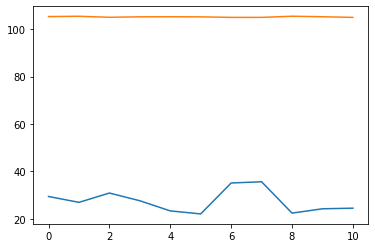

In [15]:
#Ploting training set
plt.plot(X_test)
plt.show()

In [16]:
#Predicted values
y_pred

array([[155.87988988],
       [153.44982161],
       [157.37678678],
       [154.16350009],
       [150.00613619],
       [148.78043455],
       [161.49912668],
       [161.99762662],
       [149.04083476],
       [150.86682729],
       [151.18879006]])

In [17]:
#Estimated Values
y_test

array([[155.97  ],
       [153.591 ],
       [157.6109],
       [154.24  ],
       [150.1228],
       [148.8964],
       [161.455 ],
       [161.9497],
       [149.221 ],
       [150.978 ],
       [151.2245]])

In [18]:
# Calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [19]:
# Print the mean squared error
print(mse)

0.015100822472642265


In [20]:
from sklearn.metrics import mean_squared_error
import math
print('MSE: ',mean_squared_error(y_test, y_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.015100822472642265
RMSE:  0.12288540382259508


In [21]:
# R_Square and Adjusted R Square
import statsmodels.api as sm
X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.9979845195283757 0.9978405566375455


In [22]:
#Accuracy
score = pls.score(X_test,y_test)
print(score*100,'%')

99.92328558027582 %


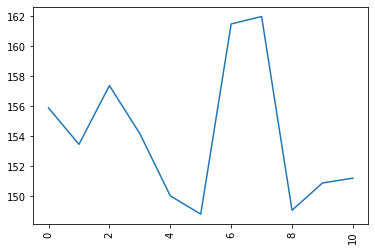

In [23]:
# plot the predicted Values
plt.plot(y_pred)
plt.xticks(rotation=90)
plt.show()